In [1]:
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc
import cv2
from skimage.measure import label

%matplotlib inline

In [2]:
letters = '`bdfhijkIABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890)(taceglnopqrsuvwxyz-,.'

In [3]:
def lines_seg(image):
    image = 255 - image 
    lined = np.sum(image, 1)
    threshold = 10
    lines_ind = []
    inertion = 0
    cut = False
    k1 = 0
    k2 = 0
    for i in range(lined.size):   
        if (lined[i] > threshold)and(not(cut)):
            k1 = i - 4
            cut = True
            inertion = 10    
        if (lined[i] < threshold)and(cut)and(inertion == 0):
            k2 = i + 4
            cut = False
            lines_ind.append((k1,k2))
        inertion = max(0, inertion - 1)
    return lines_ind



def words_seg(line):
    line = 255 - line
    size = line.shape[1]
    words_ind = []
    words_hist = np.sum(line, 0)
    threshold = 0
    inertion = 0
    cut = False
    k1 = 0
    k2 = 0
    for i in range(words_hist.size):
        place = words_hist[i]
        for k in range(5):
            place += words_hist[(i+k)%size]
        if (place > threshold)and(not(cut)):
            k1 = i
            cut = True  
        if (place <= threshold)and(cut):
            k2 = i
            cut = False
            if (k2 - k1 > 5):
                words_ind.append((k1,k2))
    return words_ind

def check_common(x,y):
    filt1 = np.sum(x,0) > 0
    filt2 = np.sum(y,0) > 0
    if np.sum(filt1*filt2) > 1:
        return True
    else:
        return False

def chars_seg(word):
    word = 255 - word
    skip = False
    labeled_word = label(word)
    labels = list(set(labeled_word.flatten()))
    labels.remove(0)
    if len(labels) == 1:
        return word
    chars_temp = []
    chars = []
    overflow = 0
    filters = []
    for i in range(len(labels)):
        chars_temp.append(np.zeros(shape=word.shape))
        filtering = labeled_word ==labels[i]
        chars_temp[i] = 255*filtering
    i = 0
    steps = len(labels) 
    while i < steps:
        j = i+1
        skip = False
        while (j < steps)and(not(skip)):
            if check_common(chars_temp[i], chars_temp[j]):
                filters.append((chars_temp[i] ==255) + (chars_temp[j] ==255))
                steps = steps - 1
                labels.pop(j)
                skip = True
                i += 1
            j += 1
        if not(skip):
            filters.append((labeled_word ==labels[i]))
            i += 1
    for i in range(len(filters)):
        chars.append(filters[i]*255)
        chars[i] = crop_char(chars[i])
    return chars
def expand_char(char,size):
    arr = np.zeros(shape = (size,size))
    height=char.shape[0] 
    width=char.shape[1] 
    offsety = (size - height)/2
    offsetx = (size - width)/2
    for i in range(offsety,height+offsety):
        for j in range(offsetx,width+offsetx):
            arr[i][j] = char[i-offsety][j-offsetx]
    return arr

def crop_char(char):
    left = 0
    size = 30
    right = char.shape[1] - 1
    bottom = char.shape[0] - 1
    top = 0
    stop = False
    ver = np.sum(char, 1)
    hor = np.sum(char, 0)
    for i in range(char.shape[0]):
        if (ver[i] <> 0)and(not(stop)):
            stop = True
            top = i
        if (ver[i] == 0)and(stop)and(i > size/2):
            bottom = i
            stop = False
    for i in range(char.shape[1]):
        if (hor[i] <> 0)and(not(stop)):
            stop = True
            left = i
        if (hor[i] == 0) and(stop):
            right = i
            stop = False 
    return expand_char(char[top:bottom,left:right],size)
    

In [5]:
image = cv2.imread('../resources/lete.jpg', 0)

In [6]:
ret, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
lines_ind = lines_seg(image)
words = []
for i in range(len(lines_ind)):
    words.append(image[lines_ind[i][0]:lines_ind[i][1]])

In [7]:
line = image[lines_ind[0][0]:lines_ind[0][1]]

In [8]:
plt.imsave('./sd.png',line)

In [9]:
ch = chars_seg(line)
chars = 

In [10]:
for i in range(len(ch)):
    os.makedirs('../resources/dataset/'+ str(i) +'/')
    for j in range(100):
        cv2.imwrite('../src/' + ch[i].png', ch[i])

OSError: [Errno 17] File exists: '../resources/dataset/0/'

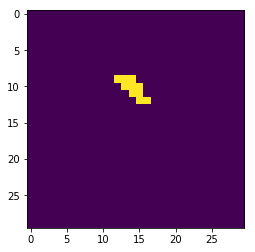

In [12]:
plt.imshow(ch[1])